#### Importing the Dependencies

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### Data Collection and Analysis

In [17]:
bike_data = pd.read_csv("./bike_sharing_dataset.csv")

In [18]:
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
bike_data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [20]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Data Preprocessing

In [21]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
bike_data.rename(columns={'weathersit': 'weather',
                          'yr': 'year',
                          'hr': 'hour',
                          'mnth': 'month',
                          'hum': 'humidity',
                          'cnt': 'count'}, inplace=True)

In [23]:
bike_data

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [24]:
columns = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
for col in columns:
    bike_data[col] = bike_data[col].astype('category')

In [25]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   year        17379 non-null  int64   
 4   month       17379 non-null  category
 5   hour        17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weather     17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  humidity    17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [26]:
bike_data = bike_data.drop(columns=['instant', 'dteday', 'year'], axis=1)

In [27]:
bike_data.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Data Visualization

In [28]:
sns.set()

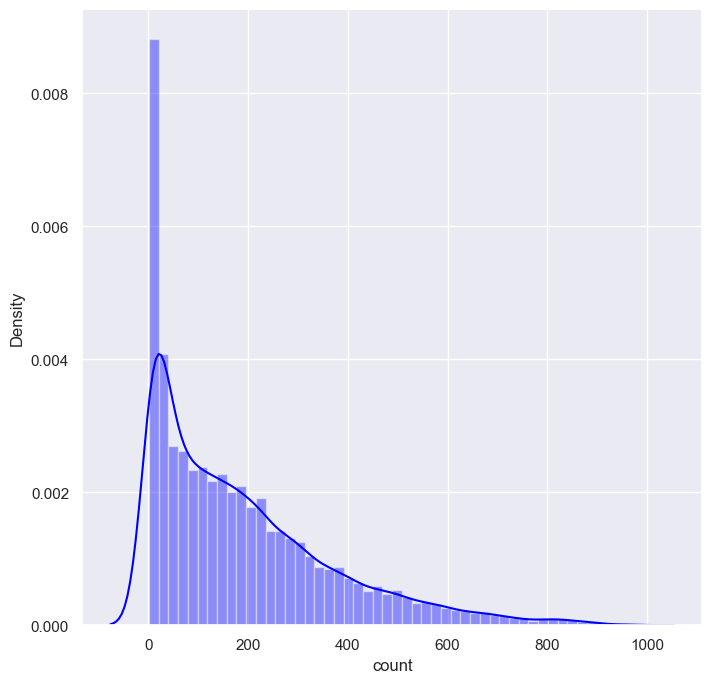

In [30]:
plt.figure(figsize=(8, 8))
sns.distplot(bike_data['count'], color="blue")
plt.show()

<AxesSubplot: xlabel='casual', ylabel='Density'>

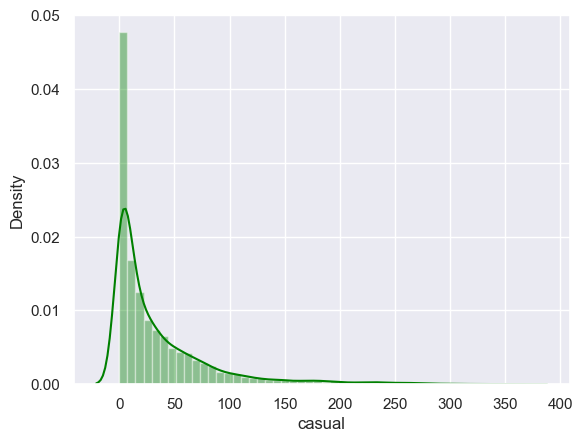

In [31]:
sns.distplot(bike_data['casual'], color='green')

#### Correlation Matrix

In [32]:
corr_matrix = bike_data.corr()

<AxesSubplot: >

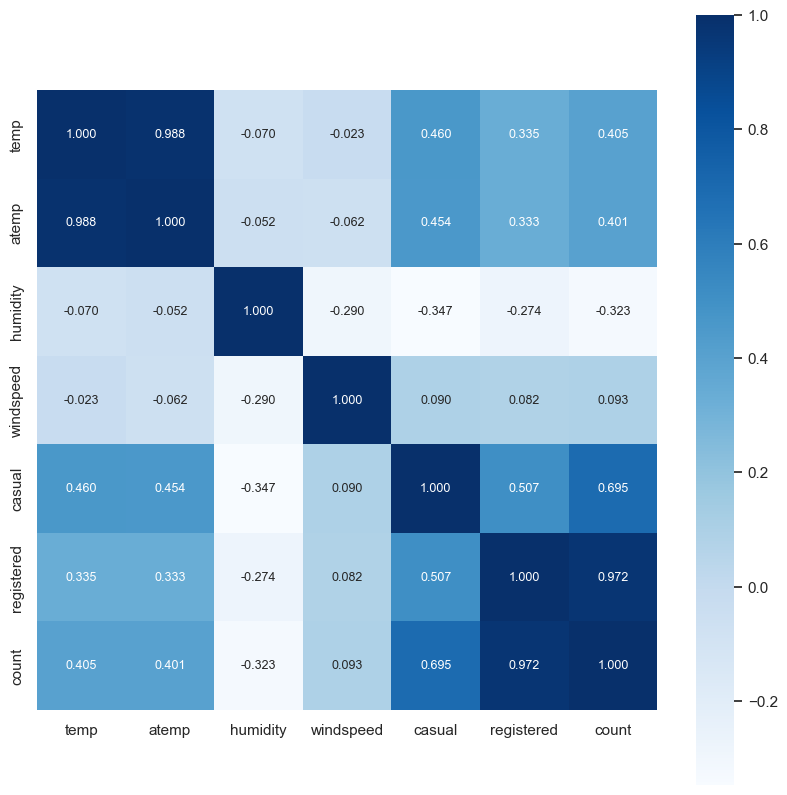

In [33]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cbar=True, square=True, fmt="0.3f", annot=True, annot_kws={'size': 9}, cmap="Blues")

#### One Hot Coding

In [34]:
data_copy = bike_data.copy()

In [35]:
def one_hot_encoding(input_data, column):
    input_data = pd.concat([input_data, pd.get_dummies(input_data[column], prefix=column, drop_first=True)], axis=1)
    input_data = input_data.drop([column], axis=1)
    return input_data

for col in columns:
    data_copy = one_hot_encoding(data_copy, col)

data_copy.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,16,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,32,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,13,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Splitting data into Features and Target

In [36]:
X = bike_data.drop(columns=["count", 'atemp', 'windspeed', 'casual', 'registered'], axis=1)
Y = bike_data['count']

In [37]:
X

,season,month,hour,holiday,weekday,workingday,weather,temp,humidity
0,1,1,0,0,6,0,1,0.24,0.81
1,1,1,1,0,6,0,1,0.22,0.80
2,1,1,2,0,6,0,1,0.22,0.80
3,1,1,3,0,6,0,1,0.24,0.75
4,1,1,4,0,6,0,1,0.24,0.75
...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,1,2,0.26,0.60
17375,1,12,20,0,1,1,2,0.26,0.60
17376,1,12,21,0,1,1,1,0.26,0.60
17377,1,12,22,0,1,1,1,0.26,0.56


In [38]:
Y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: count, Length: 17379, dtype: int64

#### Splitting data into Train and Test data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(17379, 9) (13903, 9) (3476, 9)


#### Model Training from Scratch

In [135]:
class LinearRegression2:
    def __init__(self, alpha, iters):
        self.alpha = alpha
        self.iters = iters
        
    def predict(self, X):
        return np.dot(X, self.theta.T)+self.theta0
        
    def cost(self):
        J = (-1/self.m)*((self.h(self.X, self.theta) - self.Y).T@(self.h(self.X, self.theta) - self.Y))
        return J
    
    def _gradient(self, X):
        h_x = self.predict(X)
        dtheta = (1/self.m)*np.dot(X.T, (h_x.T - self.Y))
        dtheta0 = (1/self.m)*np.sum(h_x - self.Y)
        
        self.theta = self.theta - self.alpha*dtheta
        self.theta0 = self.theta0 - self.alpha*dtheta0
    
    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)
        self.theta0 = 0
        self.X = X
        self.Y = Y
        for iter in range(self.iters):
            self._gradient(X)
            
        return self.theta
        
model = LinearRegression2(alpha=0.001, iters=1000)
model.fit(X_train, Y_train)

array([ 15.16704363,   3.35616051,  10.67353807,  -0.71598236,
         3.82246118,   3.65984663, -10.05344011,  11.91998033,
        -6.18717576])

In [133]:
def rmse(Y_true, Y_pred):
    rmse = 0
    m = Y_true.shape[0]
    for i in range(m):
        rmse += (Y_true.iloc[i] - Y_pred[i]) ** 2
    rmse = np.sqrt(rmse/m)
    print(rmse)
Y_pred = model.predict(X_train)
rmse(Y_train, Y_pred)

metrics.mean_squared_error(Y_train, Y_pred)
metrics.r2_score(Y_train, Y_pred)

161.69775287176856


0.2016650446811259

#### Linear Regression Scikit-Learn

In [136]:
model2 = LinearRegression()

In [137]:
model2.fit(X_train, Y_train)

LinearRegression()

In [139]:
Y_pred2 = model2.predict(X_train)
rmse(Y_train, Y_pred2)
metrics.r2_score(Y_train, Y_pred2)

147.07764141446816


0.3395035467353833

#### Comparing both

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


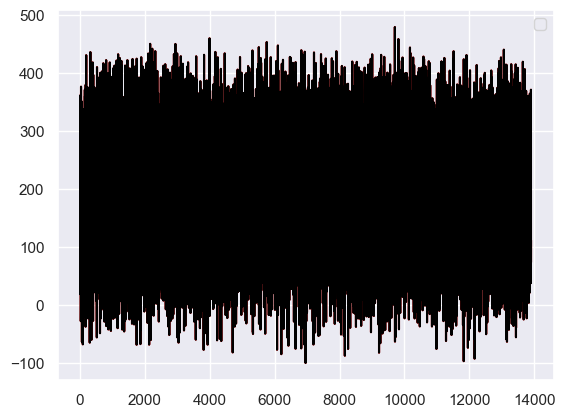

In [152]:
plt.plot(Y_pred2, color="red")
plt.plot(Y_pred, color="black")
plt.legend()
plt.show()